<a href="https://colab.research.google.com/github/andypedre2016/Data-MIning-Class/blob/main/Andy_Working_version_of_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

So far, in our exploration of machine learning, we have build sysems that predict discrete values: 

* whether a particular plant is Iris Setosa, Iris Versicolour, or Iris Virginica
* whether a person has diabetes or not
* whether a tumor is malignant or benign 


Even deciding whether an image is of a particular digit:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/MnistExamples.png)

or which of 1,000 categories does a picture represent.


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/poodleSmall.jpg)


This lab looks at how we can build classifiers that predict **continuous** values and such classifiers are called regression classifiers.

First, let's take a small detour into correlation.

## Correlation
A correlation is the degree of association between two variables. One of my favorite books on this topic is: 


![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/mg_statistics_big.png)



and they illustrate it by looking at
## Ladies expenditures on clothes and makeup
![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/mangaCorrelation1.png)
![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/mangeCorrelation2.png)



So let's go ahead and create that data in Pandas and show the table:

In [ ]:
import pandas as pd
from pandas import DataFrame
makeup =  [3000, 5000, 12000, 2000, 7000,  15000,  5000,  6000, 8000,  10000]
clothes = [7000, 8000, 25000, 5000, 12000, 30000, 10000, 15000, 20000, 18000]
ladies = ['Ms A','Ms B','Ms C','Ms D','Ms E','Ms F','Ms G','Ms H','Ms I','Ms J',]
monthly = DataFrame({'makeup': makeup, 'clothes': clothes}, index= ladies)
monthly

,makeup,clothes
Ms A,3000,7000
Ms B,5000,8000
Ms C,12000,25000
Ms D,2000,5000
Ms E,7000,12000
Ms F,15000,30000
Ms G,5000,10000
Ms H,6000,15000
Ms I,8000,20000
Ms J,10000,18000


and let's show the scatterplot

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
x = figure(title="Montly Expenditures on Makeup and Clothes", x_axis_label="Money spent on makeup", y_axis_label="Money spent on clothes")
x.circle(monthly['makeup'], monthly['clothes'], size=10, color="navy", alpha=0.5)
output_file("stuff.html")

show(x)

When the data points are close to a straight line going up, we say that there is a positive correlation between the two variables. So in the case of the plot above, it visually looks like a postive correlation. Let's look at a few more examples:

## Weight and calories consumed in 1-3 yr/old children
This small but real dataset examines whether young children who weigh more, consume more calories


In [ ]:
weight = [7.7, 7.8, 8.6, 8.5, 8.6, 9, 10.1, 11.5, 11, 10.2, 11.9, 10.4, 9.3, 9.1, 8.5, 11]
calories = [360, 400, 500, 370, 525, 800, 900, 1200, 1000, 1400, 1600, 850, 575, 425, 950, 800]
kids = DataFrame({'weight': weight, 'calories': calories})
kids

,weight,calories
0,7.7,360
1,7.8,400
2,8.6,500
3,8.5,370
4,8.6,525
5,9.0,800
6,10.1,900
7,11.5,1200
8,11.0,1000
9,10.2,1400


In [ ]:
p = figure(title="Weight and calories in 1-3 yr.old children", 
           x_axis_label="weight (kg)", y_axis_label='weekly calories')
p.circle(kids['weight'], kids['calories'], size=10, color='navy', alpha=0.5)
show(p)


And again, there appears to be a positive correlation.

## The stronger the correlation the closer to a straight line
The closer the data points are to a straight line, the higher the correlation. A rising straight line (rising going left to right) would be perfect positive correlation. Here we are comparing the heights in inches of some NHL players with their heights in cm. Obviously, those are perfectly correlated.

In [ ]:
inches =[68, 73, 69,72,71,77]
cm = [173, 185, 175, 183, 180, 196]
nhlHeights = DataFrame({'heightInches': inches, 'heightCM': cm})
nhlHeights

,heightInches,heightCM
0,68,173
1,73,185
2,69,175
3,72,183
4,71,180
5,77,196


In [ ]:
p = figure(title="Comparison of Height in Inches and Height in CM", 
           x_axis_label="Height in Inches", 
           y_axis_label="Height in centimeters")
p.circle(nhlHeights['heightInches'], nhlHeights['heightCM'],
         size=10, color='navy', alpha=0.5)
show(p)

## No correlation = far from straight line
On the opposite extreme, if the datapoints are scattered and no line is discernable, there is no correlation.

Here we are comparing length of the player's hometown name to his height in inches. We are checking whether a player whose hometown name has more letters, tends to be taller. For example, maybe someone from Medicine Hat is taller than someone from Ledue. Obviously there should be no correlation. 


(Again, a small but real dataset)

In [ ]:
medicineHat = pd.read_csv('https://raw.githubusercontent.com/zacharski/machine-learning-notebooks/master/data/medicineHatTigers.csv')
medicineHat['hometownLength'] = medicineHat['Hometown'].str.len()
medicineHat

,Name,Pos.,L/R,Height,Weight,Birthday,Hometown,hometownLength
0,Brennan Bosch,C,R,68,173,02/14/88,"Martensville, SK",16
1,Scott Wasden,C,R,73,188,01/04/88,"Westbank, BC",12
2,Colton Grant,LW,L,69,177,03/20/89,"Standard, AB",12
3,Darren Helm,LW,L,72,182,01/21/87,"St. Andrews, MB",15
4,Derek Dorsett,RW,L,71,178,12/20/86,"Kindersley, SK",14
5,Daine Todd,C,R,70,173,01/10/87,"Red Deer, AB",12
6,Tyler Swystun,RW,R,71,185,01/15/88,"Cochrane, AB",12
7,Matt Lowry,C,R,72,186,03/02/88,"Neepawa, MB",11
8,Kevin Undershute,LW,L,72,178,04/12/87,"Medicine Hat, AB",16
9,Jerrid Sauer,RW,R,71,196,09/12/87,"Medicine Hat, AB",16


In [ ]:
p = figure(title="Correlation of the number of Letters in the Hometown to Height", 
           x_axis_label="Player's Height", y_axis_label="Hometown Name Length")
p.circle(medicineHat['Height'], medicineHat['hometownLength'], size=10, color='navy', alpha=0.5)
show(p)

And that does not look at all like a straight line. 

## negative correlation has a line going downhill
When the slope goes up, we say there is a positive correlation and when it goes down there is a negative correlation.

#### the relationship of hair length to a person's height

In [ ]:
height =[62, 64, 65, 68, 69, 70, 67, 65, 72, 73, 74]
hairLength = [7, 10, 6, 4, 5, 4, 5, 8, 1, 1, 3]
cm = [173, 185, 175, 183, 180, 196]
people = DataFrame({'height': height, 'hairLength': hairLength})
p = figure(title="Correlation of hair length to a person's height", 
           x_axis_label="Person's Height", y_axis_label="Hair Length")
p.circle(people['height'], people['hairLength'], size=10, color='navy', alpha=0.5)
show(p)

There is a strong negative correlation between the length of someone's hair and how tall they are. Why do you think that is?


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)


# Numeric Representation of the Strength of the Correlation

So far, we've seen a visual representation of the correlation, but we can also represent the degree of correlation numerically.

## Pearson Correlation Coefficient

This ranges from -1 to 1.
1 is perfect positive correlation, -1 is perfect negative.

$$r=\frac{\sum_{i=1}^n(x_i - \bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i - \bar{x})}  \sqrt{\sum_{i=1}^n(y_i - \bar{y})}}$$

In Pandas it is very easy to compute.

### Japanese ladies expenses on makeup and clothes
Let's go back to our first example.
First here is the data:

In [ ]:
monthly

,makeup,clothes
Ms A,3000,7000
Ms B,5000,8000
Ms C,12000,25000
Ms D,2000,5000
Ms E,7000,12000
Ms F,15000,30000
Ms G,5000,10000
Ms H,6000,15000
Ms I,8000,20000
Ms J,10000,18000


In [ ]:
p = figure(title="Montly Expenditures on Makeup and Clothes", 
           x_axis_label="Money spent on makeup", y_axis_label="Money spent on clothes")
p.circle(monthly['makeup'], monthly['clothes'], size=10, color='navy', alpha=0.5)
show(p)


So that looks like a pretty strong positive correlation. To compute Pearson on this data we do:

In [ ]:
monthly.corr()

,makeup,clothes
makeup,1.00000,0.96802
clothes,0.96802,1.00000


There is no surprise that makeup is perfectly correlated with makeup and clothes with clothes (those are the 1.000 on the diagonal). The interesting bit is that the Pearson for makeup to clothes is 0.968. That is a pretty strong correlation. 

If you are interesting you can compute the Pearson values for the datasets above, but let's now move to ...


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)


## Regression

Let's say we know a young lady who spends about  ¥22,500 per month on clothes (that's about $200/month). What do you think she spends on makeup, based on the chart below?

In [ ]:
show(p)

I'm guessing you would predict she spends somewhere around  ¥10,000 a month on makeup (almost $100/month). And how we do this is when looking at the graph  we mentally draw an imaginary straight line through the datapoints and use that line for predictions. We are performing human linear regression.  And as humans, we have the training set--the dots representing data points on the graph. and we **fit** our human classifier by mentally drawing that straight line. That straight line is our model. Once we have it, we can throw away the data points. When we want to make a prediction, we see where the money spent on clothes falls on that line. 

We just predicted a continuous value (money spent on makeup) from one factor (money spent on clothes).

## Predicting MPG

What happens when we want to predict a continuous value from 2 factors? Suppose we want to predict MPG based on the weight of a car and its horsepower.

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/regression.png)
from [Mathworks](https://www.mathworks.com/help/stats/regress.html)

Now instead of a line representing the relationship we have a plane.

Let's create a linear regression classifier and try this out!

First, let's get the data.


In [ ]:
columnNames = ['mpg', 'cylinders', 'displacement', 'HP', 'weight', 'acceleration', 'year', 'origin', 'model']
cars = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/auto-mpg.csv',
                   na_values=['?'], names=columnNames)
cars = cars.set_index('model')
cars = cars.dropna()
cars

,mpg,cylinders,displacement,HP,weight,acceleration,year,origin
model,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790.0,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130.0,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295.0,11.6,82,1


Now divide the dataset into training and testing. And let's only use the horsepower and weight columns as features.

In [ ]:
from sklearn.model_selection import train_test_split
cars_train, cars_test = train_test_split(cars, test_size = 0.2)
cars_train_features = cars_train[['HP', 'weight']]
# cars_train_features['HP'] = cars_train_features.HP.astype(float)
cars_train_labels = cars_train['mpg']
cars_test_features = cars_test[['HP', 'weight']]
# cars_test_features['HP'] = cars_test_features.HP.astype(float)
cars_test_labels = cars_test['mpg']

cars_test_features

,HP,weight
model,,
chevrolet woody,60.0,2164.0
chevrolet malibu classic (sw),125.0,3605.0
amc pacer d/l,95.0,3193.0
audi 100 ls,90.0,2430.0
subaru dl,67.0,2145.0
...,...,...
plymouth horizon tc3,70.0,2150.0
mercury zephyr,85.0,3070.0
ford pinto (sw),86.0,2395.0


### SKLearn Linear Regression

Now let's create a Linear Regression classifier and fit it.

In [ ]:
from sklearn.linear_model import LinearRegression
linclf = LinearRegression()
linclf.fit(cars_train_features, cars_train_labels)

LinearRegression()

and finally use the trained classifier to make predictions on our test data

In [ ]:
predictions = linclf.predict(cars_test_features)
predictions

array([30.11391086, 18.79036945, 22.6567551 , 27.03203046, 29.83040287,
       26.90036541, 25.9144536 , 19.47574748, 20.6375891 , 26.81187313,
       22.83546466, 30.12864095, 31.71782936, 29.25000944, 20.03318327,
       15.44362014, 31.41553336, 24.77793979, 10.18054268,  7.76078479,
       22.54530518, 30.31264936, 13.54578212, 28.57830675, 27.68494514,
       29.33598262, 32.57883932, 21.27562474, 23.669608  , 19.40172465,
       11.59632038, 24.20408615, 30.04665122, 30.79760113, 26.35499167,
        8.40558363, 25.39316673,  9.39010556, 13.20192664, 29.12781287,
       26.76606955, 29.72158376, 23.82408175, 12.61484448, 27.25650636,
       26.058069  , 24.5844629 , 23.16305123, 23.95311599, 30.33140014,
       23.14572756, 14.80734672, 25.0168479 , 17.252209  , 18.32307646,
       30.15821285, 24.40052896, 23.33251572, 28.99340531, 30.68607674,
       17.05320984, 20.70755401, 23.11735936, 26.46384802, 28.17940262,
       10.81978202, 17.05320984, 17.91053424, 18.2072335 , 31.24

Let's take an informal look at how we did:

In [ ]:
results = cars_test_labels.to_frame()
results['Predicted']= predictions
results

,mpg,Predicted
model,,
chevrolet woody,24.5,30.113911
chevrolet malibu classic (sw),19.2,18.790369
amc pacer d/l,17.5,22.656755
audi 100 ls,24.0,27.032030
subaru dl,33.8,29.830403
...,...,...
plymouth horizon tc3,34.5,29.638279
mercury zephyr,20.8,23.868533
ford pinto (sw),22.0,27.440440


Here is what my output looked like:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/predictMPG.png)

as you can see the first two predictions were pretty close as were a few others.




![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)

### Determining how well the classifier performed

With categorical classifiers we used sklearn's accuracy_score:

```
from sklearn.metrics import accuracy_score
```
Consider a task of predicting whether an image is of a dog or a cat. We have 10 instances in our test set. After our classifier makes predictions, for each image we have the actual (true) value, and the value our classifier predicted:

actual | predicted
:-- | :---
dog | dog
**dog** | **cat**
cat | cat
dog | dog
cat | cat
**cat** | **dog**
dog | dog
cat | cat
cat | cat
dog | dog

sklearn's accuracy score just counts how many predicted values matched the actual values and then divides by the total number of test instances. In this case the accuracy score would be .8000. The classifier was correct 80% of the time. 

We can't use this method with a regression classifier. In the image above, the actual MPG of the Peugeot 304 was 30 and our classifier predicted 30.038619. Does that count as a match or not? The actual mpg of a Pontiac Sunbird Coupe was 24.5 and we predicted 25.57. Does that count as a match? Instead of accuracy_score, there are different evaluation metrics we can use. 

#### Mean Squared Error and Root Mean Square Error

A common metric is Mean Squared Error or MSE. MSE is a measure of the quality of a regression classifier. The closer MSE is to zero, the better the classifier. Let's look at some made up data to see how this works:

vehicle | Actual MPG | Predicted MPG
:---: | ---: | ---: 
Ram Promaster 3500 | 18.0 | 20.0
Ford F150 | 20 | 19
Fiat 128 | 33 | 33

First we compute the error (the difference between the predicted and actual values)

vehicle | Actual MPG | Predicted MPG | Error
:---: | ---: | ---: | --:
Ram Promaster 3500 | 18.0 | 20.0 | -2
Ford F150 | 20 | 19 | 1
Fiat 128 | 33 | 33 | 0

Next we square the error and compute the average:

vehicle | Actual MPG | Predicted MPG | Error | Error^2
:---: | ---: | ---: | --: | ---:
Ram Promaster 3500 | 18.0 | 20.0 | -2 | 4
Ford F150 | 20 | 19 | 1 | 1
Fiat 128 | 33 | 33 | 0 | 0
MSE | - | - | - | 1.667

**Root Mean Squared Error** is simply the square root of MSE. The advantage of RMSE is that it has the same units as what we are trying to predict. Let's take a look ...

In [ ]:
from sklearn.metrics import mean_squared_error
MSE  = mean_squared_error(cars_test_labels, predictions)
RMSE = mean_squared_error(cars_test_labels, predictions, squared=False)
print("MSE: %5.3f.   RMSE: %5.3f" %(MSE, RMSE))

MSE: 21.071.   RMSE: 4.590


That RMSE tells us on average how many mpg we were off.






![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)

# <font color='#EE4C2C'>You Try ... </font> 
## <font color='#EE4C2C'>Predicting the range of electric vehicles</font> 

We are wondering whether we can predict the range of an EV from its battery capacity and efficiency. It seems like it might. If our battery holds 60 kWh (kilowatt hours), and it it takes 200 wh (watt hours) to go 1 kilometer, you might predict that we could go 60,000 / 200 = 300 kilometers on a charge. This is equivalent to if you know the capacity of your gas tank and how efficient (MPG) your car is you can roughly predict the range of your car. For example, if the tank capacity is 10 gallons and it gets 30 MPG, you should be able to go 300 miles.

The data is in the file 

[https://raw.githubusercontent.com/zacharski/ml-class/master/data/ElectricCarData_w_battery.csv](https://raw.githubusercontent.com/zacharski/ml-class/master/data/ElectricCarData_w_battery.csv)

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>1. Load that file into a Pandas DataFrame</font> 

In [ ]:
#TODO
import pandas as pd

evCars = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/ElectricCarData_w_battery.csv')
evCars = evCars.set_index('Model')
evCars

,Brand,AccelSec,TopSpeed_KmH,battery_kWh,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Model,,,,,,,,,,,,,,
Model 3 Long Range Dual Motor,Tesla,4.6,233,80.0,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
ID.3 Pure,Volkswagen,10.0,160,55.0,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,4.7,210,78.0,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
iX3,BMW,6.8,180,74.0,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
e,Honda,9.5,145,28.5,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ariya e-4ORCE 87kWh Performance,Nissan,5.1,200,87.0,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
M-Byte 95 kWh 2WD,Byton,7.5,190,95.0,400,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000
R1T,Rivian,3.0,185,135.0,505,299,337,Yes,AWD,Type 2 CCS,Pickup,N,6,75000


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>2. Divide into training and test datasets</font> 
Now divide the dataset into training and testing. And let's only use the `Efficiency_WhKm`, `battery_kWh` columns as features and the column `Range_Km` is what we are trying to predict.

In [ ]:
evCars_train, evCars_test = train_test_split(evCars, test_size = 0.2)

evCars_train_features = evCars_train[['Efficiency_WhKm', 'battery_kWh']]
evCars_train_labels = evCars_train['Range_Km']
evCars_test_features = evCars_test[['Efficiency_WhKm', 'battery_kWh']]
evCars_test_labels = evCars_test['Range_Km']

evCars_test_features

,Efficiency_WhKm,battery_kWh
Model,,
iX3,206,74.0
Kangoo Maxi ZE 33,194,33.0
Taycan Turbo S,223,83.7
el-Born,181,77.0
Mii Electric,166,32.3
i3 120 Ah,161,42.2
Model 3 Long Range Performance,167,75.0
ID.3 1st,171,62.0
Cybertruck Dual Motor,261,200.0


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>3. SKLearn Linear Regression</font> 

Now let's create a Linear Regression classifier and fit it.

In [ ]:
linclff = LinearRegression()
linclff.fit(evCars_train_features, evCars_train_labels)

LinearRegression()

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>4. Predictions</font>
Let's use the classifier to make predictions on our test dataset.

In [ ]:
predi = linclff.predict(evCars_test_features)

results = evCars_test_labels.to_frame()
results['Predicted']= predi
results

,Range_Km,Predicted
Model,,
Enyaq iV vRS,400,380.810878
Model S Performance,505,473.224900
F150 Lightning,514,519.355304
Hummer EV,529,600.855553
Ariya e-4ORCE 63kWh,325,326.837463
e-Up!,195,242.148265
ID.3 Pure,270,326.739258
IONIQ Electric,250,279.297603
I-Pace,365,366.395706


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>5. RMSE</font>
What is the Root Mean Square Error?

In [ ]:
RMSE = mean_squared_error(evCars_test_labels, predi, squared=False)
print("RMSE: %5.3f" %(RMSE))

RMSE: 31.374


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>6. How well does the classifier work?</font>
Not too good. The Root Mean Square Error is very high, seem that our classifier is not very accurate.


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)



## So what kind of model does a linear regression classifier build?

You probably know this if you reflect on grade school math classes you took. 

Let's go back and look at the young ladies expenditures on clothes and makeup.

In [ ]:
p = figure(title="Montly Expenditures on Makeup and Clothes", 
           x_axis_label="Money spent on makeup", y_axis_label="Money spent on clothes")
p.circle(monthly['makeup'], monthly['clothes'], size=10, color='navy', alpha=0.5)
show(p)

When we talked about this example above, I mentioned that when we do this, we imagine a line. Let's see if we can use sklearns linear regression classifier to draw that line:

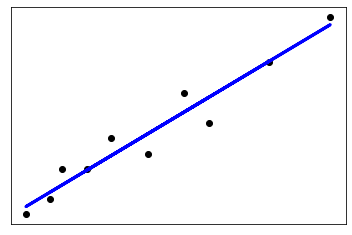

In [ ]:
regr = LinearRegression()
regr.fit(monthly[['clothes']], monthly['makeup'])
pred = regr.predict(monthly[['clothes']])

import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(monthly['clothes'], monthly['makeup'],  color='black')
plt.plot(monthly['clothes'], pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Hopefully that matches your imaginary line!

The formula for the line is

$$makeup=w_0clothes + y.intercept$$

We can query our classifier for those values ($w_0$, and $y.intercept$):

In [ ]:
print('w0 = %5.3f' % regr.coef_)
print('y intercept = %5.3f' % regr.intercept_)

w0 = 0.479
y intercept = 121.782


So the formula for this particular example is

$$ makeup = 0.479 * clothes + 121.782$$

So if a young lady spent ¥22,500 on clothes we would predict she spent the following on makeup:



In [ ]:
makeup = regr.coef_[0] * 22500 + regr.intercept_
makeup

10889.10891089109

The formula for regression in general is

$$\hat{y}=\theta_0 + \theta_1x_1 + \theta_2x_2 + ... \theta_nx_n$$

where $\theta_0$ is the y intercept.  When you fit your classifier it is learning all those $\theta$'s. That is the model your classifier learns. 

It is important to understand this as it applies to other classifiers as well!


![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)


## Overfitting
Consider two models for our makeup predictor. One is the straight line:

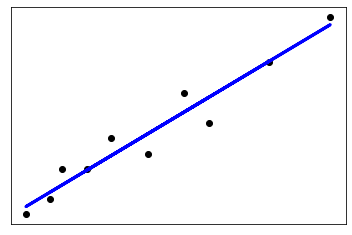

In [ ]:
plt.scatter(monthly['clothes'], monthly['makeup'],  color='black')
plt.plot(monthly['clothes'], pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

And the other looks like:

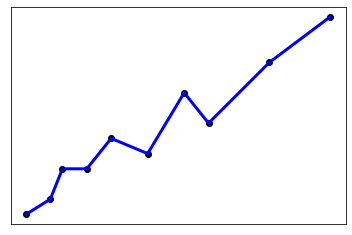

In [ ]:
monthly2 = monthly.sort_values(by='clothes')
plt.scatter(monthly2['clothes'], monthly2['makeup'],  color='black')
plt.plot(monthly2['clothes'], monthly2['makeup'], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

The second model fits the training data perfectly. Is it better than the first?  Here is what could happen.  

Let's say we have been tuning our model using our validation data set. Our error rates look like 

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/overfitter.png)

As you can see our training error rate keeps going down, but at the very end our validation error increases. This is called **overfitting** the data. The model is highly tuned to the nuances of the training data. So much so, that it hurts the performance on new data--in this case, the validation data. This, obviously, is not a good thing.



![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/divider.png)
#### An aside 

Imagine preparing for a job interview for a position you really, really, want. Since we are working on machine learning, let's say it is a machine learning job. In their job ad they list a number of things they want the candidate to know:

* Convolutional Neural Networks
* Long Short Term Memory models
* Recurrent Neural Networks
* Generative Deep Learning

And you spend all your waking hours laser focused on these topics. You barely get any sleep and you read articles on these topics while you eat. You know the tiniest intricacies of these topics. You are more than 100% ready.

The day of the interview arrives. After of easy morning of chatting with various people, you are now in a conference room for the technical interview, standing at a whiteboard, ready to hopefully wow them with your wisdom. The first question they ask is for you to write the solution to the fizz buzz problem:

> Write a program that prints the numbers from 1 to 100. But for multiples of three print “Fizz” instead of the number and for the multiples of five print “Buzz”. For numbers which are multiples of both three and five print “FizzBuzz”

And you freeze. This is a simple request and a very common interview question. In fact, to prepare you for this job interview possibility, write it now:





In [ ]:
def fizzbuzz():
  for i in range (1,101):
    if i % 3 == 0 and i % 5 == 0 :
      print("FizzBuzz")
    elif i % 3 == 0:
      print("Fizz")
    elif i % 5 == 0:
      print("Buzz")
    else:
      print(i)

In [ ]:
fizzbuzz()

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


Back to the job candidate freezing, this is an example of overfitting. You overfitting to the skills mentioned in the job posting.

At dissertation defenses often faculty will ask the candidate questions outside of the candidate's dissertation. I heard of one case in a physics PhD defense where a faculty member asked "Why is the sky blue?" and the candidate couldn't answer. 

Anyway, back to machine learning.

---


There are a number of ways to reduce the likelihood of overfitting including

* We can reduce the complexity of the model. Instead of going with the model of the jagged line immediately above we can go with the simpler straight line model. We have seen this in decision trees where we limit the depth of the tree.

* Another method is to increase the amount of training data.

Let's examine the first. The process of reducing the complexity of a model is called regularization.

The linear regression model we have just used tends to overfit the data and there are some variants that are better and these are called regularized linear models. These include

* Ridge Regression
* Lasso Regression
* Elastic Net - a combination of Ridge and Lasso

Let's explore Elastic Net. And let's use all the columns of the car mpg dataset:

In [ ]:
newTrain_features = cars_train.drop('mpg', axis=1)
newTrain_labels = cars_train['mpg']
newTest_features = cars_test.drop('mpg', axis=1)
newTest_labels = cars_test['mpg']

First, let's try with our standard Linear Regression classifier:

In [ ]:
linclf = LinearRegression()
linclf.fit(newTrain_features, newTrain_labels)
predictions = linclf.predict(newTest_features)

In [ ]:
MSE  = mean_squared_error(newTest_labels, predictions)
RMSE = mean_squared_error(newTest_labels, predictions, squared=False)
print("MSE: %5.3f.   RMSE: %5.3f" %(MSE, RMSE))

MSE: 11.467.   RMSE: 3.386


Now let's try with [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(newTrain_features, newTrain_labels)
ePredictions = elastic_net.predict(newTest_features)

In [ ]:
MSE  = mean_squared_error(newTest_labels, ePredictions)
RMSE = mean_squared_error(newTest_labels, ePredictions, squared=False)
print("MSE: %5.3f.   RMSE: %5.3f" %(MSE, RMSE))



MSE: 11.774.   RMSE: 3.431


I've run this a number of times. Sometimes linear regression is slightly better and sometimes ElasticNet is.  Here are the results of one run:

##### RMSE

Linear Regression | Elastic Net
:---: | :---:
2.864 | 2.812

So this is not the most convincing example.

However, in general, it is always better to have some regularization, so (mostly) you should avoid the generic linear regression classifier.

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)

# <font color='#EE4C2C'>You Try ... Happiness</font> 
## <font color='#EE4C2C'>Better Life Index</font> 


What better way to explore regression then to look at happiness.

From a Zen perspective, happiness is being fully present in the current moment. 

But, ignoring that advice, let's see if we can predict happiness, or life satisfaction.

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/happy2.png)

We are going to be investigating the [Better Life Index](https://stats.oecd.org/index.aspx?DataSetCode=BLI). You can download a csv file of that data from that site. (under the *Export* menu select *Text File (CSV)*)

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/better2.png)

Now that you have the CSV data file on your laptop, you can upload it to Colab.

In Colab, you will see a list of icons on the left. 

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/uploadFile4.png)

Select the file folder icon. 

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/uploadFiles5b.png)

Next, select the upload icon (the page with an arrow icon). And upload the file.

Next, let's execute the Linux command `ls`:



In [ ]:
!ls

BLI_09102022031746352.csv  sample_data	stuff.html


You will notice that the BLI file is now uploaded to Google Colab.

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>1. Load that file into a Pandas DataFrame</font> 

We will load the file into Pandas Dataframe called `bli` for better life index:

In [ ]:
# TO DO

bli = pd.read_csv("BLI_09102022031746352.csv")
bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,CRI,Costa Rica,PS_REPH,Homicide rate,L,Value,MN,Men,RATIO,Ratio,0,Units,NaN,NaN,18.2,NaN,NaN
2365,CRI,Costa Rica,PS_REPH,Homicide rate,L,Value,WMN,Women,RATIO,Ratio,0,Units,NaN,NaN,1.8,NaN,NaN
2366,CRI,Costa Rica,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,22.0,NaN,NaN
2367,CRI,Costa Rica,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,27.9,NaN,NaN


When examining the DataFrame we can see it has an interesting structure. So the first row we can parse:

* The country is Australia
* The feature is Labour market insecurity
* The Inequality column tells us it is the **total** Labour market insecurity value.
* The unit column tells the us the number is a percentage.
* And the value is 3.1 (this may be different if you have a newer version of the file than the one I used)

So, in English, the column is The total labor market insecurity for Australia is 5.40%.

I am curious as to what values other than Total are in the Inequality column:





In [ ]:
bli.Inequality.unique()

array(['Total', 'Men', 'Women', 'High', 'Low'], dtype=object)

Cool. So in addition to the total for each feature, we can get values for just men, just women, and the high and low. 

Let's get just the totals and then pivot the DataFrame so it is in a more usable format. 

In addition, there are a lot of NaN values in the data, let's replace them with the mean value of the column.

We are just learning about regression and this is a very small dataset, so let's divide training and testing by hand ...

In [ ]:
bli = bli[bli["INEQUALITY"]=="TOT"]
bli = bli.pivot(index="Country", columns="Indicator", values="Value")
bli.fillna(bli.mean(), inplace=True)
bliTest = bli.loc['Greece':'Italy', :]
bliTrain = pd.concat([bli.loc[:'Germany' , :], bli.loc['Japan':, :]])
bliTrain

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,4.261538,84.000000,12.500,73.0,67.0,0.9,37433.000000,528768.000000,19.40,...,55206.000000,93.0,1.658974,85.00,2.70,499.0,14.36000,92.0,92.0,20.0
Austria,12.2,0.800000,86.000000,5.300,72.0,86.0,0.5,37001.000000,309637.000000,20.80,...,53132.000000,92.0,1.600000,71.00,1.30,491.0,14.51000,76.0,92.0,17.0
Belgium,12.8,0.700000,80.000000,4.300,65.0,56.0,1.1,34884.000000,447607.000000,20.00,...,54327.000000,90.0,2.100000,74.00,2.00,500.0,15.52000,88.0,79.0,19.0
Brazil,11.7,6.700000,57.000000,5.600,57.0,45.0,19.0,29598.583333,323959.633333,20.35,...,43933.055556,83.0,1.658974,67.95,2.20,400.0,15.06913,80.0,70.0,16.0
Canada,7.1,0.200000,92.000000,3.300,70.0,78.0,1.2,34421.000000,478240.000000,22.90,...,55342.000000,93.0,2.600000,89.00,2.90,517.0,14.57000,68.0,90.0,17.0
Chile,23.4,9.400000,67.000000,7.700,56.0,41.0,2.4,29598.583333,135787.000000,18.40,...,26729.000000,88.0,1.900000,60.00,1.30,438.0,15.06913,47.0,62.0,17.0
Colombia,22.6,12.300000,59.000000,23.700,58.0,50.0,23.1,29598.583333,323959.633333,20.35,...,43933.055556,80.0,1.000000,80.00,1.40,406.0,15.06913,53.0,82.0,14.0
Costa Rica,17.5,2.300000,43.000000,22.000,55.0,47.0,10.0,16517.000000,323959.633333,17.00,...,43933.055556,82.0,1.200000,73.00,1.80,415.0,15.06913,66.0,87.0,17.5
Czech Republic,17.0,0.500000,94.000000,4.500,74.0,77.0,0.7,26664.000000,323959.633333,23.40,...,29885.000000,96.0,1.500000,62.00,1.60,495.0,15.06913,62.0,89.0,18.0


We are trying to predict Life satisfaction, where *life satisfaction* is defined as:

>The indicator considers people's evaluation of their life as a whole. It is a weighted-sum of different response categories based on people's rates of their current life relative to the best and worst possible lives for them on a scale from 0 to 10, using the Cantril Ladder (known also as the "Self-Anchoring Striving Scale").
“High”/ “Low” refer to values for people with tertiary/ below upper secondary education.

Let's get some basic information on life satisfaction from the dataset:

In [ ]:
bli['Life satisfaction'].describe()

count    42.000000
mean      6.602381
std       0.716526
min       4.900000
25%       6.100000
50%       6.600000
75%       7.200000
max       7.900000
Name: Life satisfaction, dtype: float64

So the indicator is a scale from 0 to 10, but the minimum satisfaction in our dataset was 4.9 and the happiest (i.e. life satisfaction) was 7.9. Let's find out which countries they were: {again you might have a newer version of the data)



In [ ]:
print("The least happy country is " + bli['Life satisfaction'].idxmin())
print("The happiest country is " + bli['Life satisfaction'].idxmax())

The least happy country is South Africa
The happiest country is Finland


#### Now we need to divide both the training and test sets into features and labels. 

In [ ]:
feature_names = bliTrain.columns.values.tolist()
feature_names.remove('Life satisfaction')
feature_names

['Air pollution',
 'Dwellings without basic facilities',
 'Educational attainment',
 'Employees working very long hours',
 'Employment rate',
 'Feeling safe walking alone at night',
 'Homicide rate',
 'Household net adjusted disposable income',
 'Household net wealth',
 'Housing expenditure',
 'Labour market insecurity',
 'Life expectancy',
 'Long-term unemployment rate',
 'Personal earnings',
 'Quality of support network',
 'Rooms per person',
 'Self-reported health',
 'Stakeholder engagement for developing regulations',
 'Student skills',
 'Time devoted to leisure and personal care',
 'Voter turnout',
 'Water quality',
 'Years in education']

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>2. Dividing the datasets into features and labels</font> 

Go ahead and construct:

* `bliTrain_features`
* `bliTrain_labels`
* `bliTest_features`
* `bliTest_labels`




In [ ]:
# TO DO

bliTrain_features = bliTrain[['Air pollution',
 'Dwellings without basic facilities',
 'Educational attainment',
 'Employees working very long hours',
 'Employment rate',
 'Feeling safe walking alone at night',
 'Homicide rate',
 'Household net adjusted disposable income',
 'Household net wealth',
 'Housing expenditure',
 'Labour market insecurity',
 'Life expectancy',
 'Long-term unemployment rate',
 'Personal earnings',
 'Quality of support network',
 'Rooms per person',
 'Self-reported health',
 'Stakeholder engagement for developing regulations',
 'Student skills',
 'Time devoted to leisure and personal care',
 'Voter turnout',
 'Water quality',
 'Years in education']]

bliTrain_labels = bliTrain['Life satisfaction']

bliTest_features = bliTest[['Air pollution',
 'Dwellings without basic facilities',
 'Educational attainment',
 'Employees working very long hours',
 'Employment rate',
 'Feeling safe walking alone at night',
 'Homicide rate',
 'Household net adjusted disposable income',
 'Household net wealth',
 'Housing expenditure',
 'Labour market insecurity',
 'Life expectancy',
 'Long-term unemployment rate',
 'Personal earnings',
 'Quality of support network',
 'Rooms per person',
 'Self-reported health',
 'Stakeholder engagement for developing regulations',
 'Student skills',
 'Time devoted to leisure and personal care',
 'Voter turnout',
 'Water quality',
 'Years in education']]

bliTest_labels = bliTest['Life satisfaction']



![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>3. Create and Train an elastic net model</font> 

In [ ]:
# TO DO
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elastic_net.fit(bliTrain_features, bliTrain_labels)
elastic_net.coef_

array([-6.95146759e-03,  7.04981992e-03,  1.79525382e-03, -2.10209702e-02,
        9.08247840e-03,  0.00000000e+00, -8.11285193e-04,  1.56814980e-05,
       -2.17062310e-07,  1.04213340e-02, -4.58078103e-02,  4.18772946e-02,
       -0.00000000e+00, -4.92320709e-06,  2.30091879e-02,  0.00000000e+00,
        1.37604347e-02,  0.00000000e+00, -4.70899093e-03,  0.00000000e+00,
        6.42806185e-03,  1.94080624e-02,  0.00000000e+00])



![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/PyDivideTwo.png)
## <font color='#EE4C2C'>4. Use the trained model to make predictions on our tiny test set</font> 

 

In [ ]:
# TO DO
Predictions = elastic_net.predict(bliTest_features)
Predictions

array([5.42357206, 6.5342967 , 7.45459587, 6.99968434, 6.71047296,
       6.52232261])

Now let's visually compare the differences between the predictions and the actual values

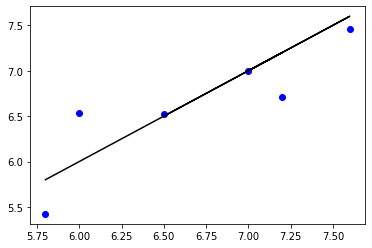

In [ ]:
plt.scatter(bliTest_labels, Predictions, color= 'blue')
plt.plot(bliTest_labels, bliTest_labels, color= 'black')

plt.xticks()
plt.yticks()

plt.show()

How did you do? For me Iceland was a lot happier than what was predicted.

Now we will compute error:

In [ ]:
MSE  = mean_squared_error(bliTest_labels, Predictions)
RMSE = mean_squared_error(bliTest_labels, Predictions, squared=False)
print("MSE: %5.3f.   RMSE: %5.3f" %(MSE, RMSE))

MSE: 0.115.   RMSE: 0.339




# Prediction Housing Prices

## But first some wonkiness
When doing one hot encoding, sometimes the original datafile has the same type of data in multiple columns. For example...

Title | Genre 1 | Genre 2
 :--: | :---: | :---: 
 Mission: Impossible - Fallout | Action | Drama
 Mama Mia: Here We Go Again | Comedy | Musical
 Ant-Man and The Wasp | Action | Comedy
 BlacKkKlansman | Drama | Comedy
 
 
 When we one-hot encode this we get something like
 
 Title | Genre1 Action | Genre1 Comedy | Genre1 Drama | Genre2 Drama | Genre2 Musical | Genre2 Comedy
  :--: | :--: | :--: | :--: | :--: | :--: | :--: 
  Mission: Impossible - Fallout | 1 | 0 | 0 | 1 | 0 | 0
  Mama Mia: Here We Go Again  | 0 | 1 | 0 | 0 | 1 | 0
  Ant-Man and The Wasp | 1 | 0 | 0 | 0 | 0 | 1
  BlacKkKlansman | 0 | 0 | 1 | 0 | 0 | 1
  
  But this isn't what we probably want. Instead this would be a better representation:
  
  Title | Action | Comedy | Drama | Musical
  :---: | :---: | :---: |  :---: | :---: | 
  Mission: Impossible - Fallout | 1 | 0 | 1 | 0
  Mama Mia: Here We Go Again  | 0 | 1 | 0 | 1
  Ant-Man and The Wasp | 1 | 1 | 0 | 0
  BlacKkKlansman | 0 | 1 | 1 | 0
  
  Let's see how we might do this in code


In [ ]:
df   = pd.DataFrame({'Title': ['Mission: Impossible - Fallout', 'Mama Mia: Here We Go Again', 
                               'Ant-Man and The Wasp', 'BlacKkKlansman' ],
                    'Genre1': ['Action', 'Comedy', 'Action', 'Drama'],
                    'Genre2': ['Drama', 'Musical', 'Comedy', 'Comedy']})
df

,Title,Genre1,Genre2
0,Mission: Impossible - Fallout,Action,Drama
1,Mama Mia: Here We Go Again,Comedy,Musical
2,Ant-Man and The Wasp,Action,Comedy
3,BlacKkKlansman,Drama,Comedy


In [ ]:
houseP_hot_1 = pd.get_dummies(df['Genre1'])
houseP_hot_2 = pd.get_dummies(df['Genre2'])

In [ ]:
# now get the intersection of the column names
s1 = set(houseP_hot_1.columns.values)
s2 = set(houseP_hot_2.columns.values)
intersect = s1 & s2
only_s1 = s1 - intersect
only_s2 = s2 - intersect
# now logically or the intersect
logical_or = houseP_hot_1[list(intersect)] | houseP_hot_2[list(intersect)]
# then combine everything
combined = pd.concat([houseP_hot_1[list(only_s1)], logical_or, houseP_hot_2[list(only_s2)]], axis=1)
combined

### Now drop the two original columns and add the one hot encoded columns
df= df.drop('Genre1', axis=1)
df= df.drop('Genre2', axis=1)
df = df.join(combined)
df

,Title,Action,Drama,Comedy,Musical
0,Mission: Impossible - Fallout,1,1,0,0
1,Mama Mia: Here We Go Again,0,0,1,1
2,Ant-Man and The Wasp,1,0,1,0
3,BlacKkKlansman,0,1,1,0


That looks more like it!!!

![](https://raw.githubusercontent.com/zacharski/datamining-guide/master/labs/pics/torchdivide.png)

# <font color='#EE4C2C'>The task: Predict Housing Prices</font> 



Your task is to create a regession classifier that predicts house prices. The data and a description of

* [The description of the data](https://raw.githubusercontent.com/zacharski/ml-class/master/data/housePrices/data_description.txt)
* [The CSV file](https://raw.githubusercontent.com/zacharski/ml-class/master/data/housePrices/data.csv)


Minimally, your classifier should be trained on the following columns:

In [6]:
numericColumns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
                 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice']
categoryColumns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                   'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 
                   'HouseStyle', 'RoofStyle', 'RoofMatl' ]

# Using multicolumns is optional
multicolumns = [['Condition1', 'Condition2'], ['Exterior1st', 'Exterior2nd']]

You are free to use more columns than these. Also, you may need to process some of the columns. 
 Here are the requirements:
 
 ### 1. Drop any data rows that contain Nan in a column. 
 Once you do this you should have around 1200 rows.
 ### 2. Use the following train_test_split parameters
  ```
train_test_split( originalData, test_size=0.20, random_state=42)
```

 ### 3. You are to compare Linear Regression and Elastic Net
 ### 4. You should use 10 fold cross validation (it is fine to use grid search)
 ### 5. When finished tuning your model, determine the accuracy on the test data using RMSE.

# Performance Bonus
You are free to adjust any hyperparameters but do so before you evaluate the test data. You may get up to 15xp bonus for improved accuracy. 

Good luck!

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

houseP = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/housePrices/data.csv')
houseP = houseP.set_index('Id')
houseP

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [10]:
houseP_hot = pd.get_dummies(houseP.MSZoning)
houseP = houseP.drop('MSZoning', axis=1)

houseP_hot = pd.get_dummies(houseP.Alley)
houseP = houseP.drop('Alley', axis=1)

houseP_hot = pd.get_dummies(houseP.LandContour)
houseP = houseP.drop('LandContour', axis=1)

houseP_hot = pd.get_dummies(houseP.LotConfig)
houseP = houseP.drop('LotConfig', axis=1)

houseP_hot = pd.get_dummies(houseP.LandSlope)
houseP = houseP.drop('LandSlope', axis=1)

houseP_hot = pd.get_dummies(houseP.Neighborhood)
houseP = houseP.drop('Neighborhood', axis=1)

houseP_hot = pd.get_dummies(houseP.BldgType)
houseP = houseP.drop('BldgType', axis=1)

houseP_hot = pd.get_dummies(houseP.HouseStyle)
houseP = houseP.drop('HouseStyle', axis=1)

houseP_hot = pd.get_dummies(houseP.RoofStyle)
houseP = houseP.drop('RoofStyle', axis=1)

houseP_hot = pd.get_dummies(houseP.RoofMatl)
houseP = houseP.drop('RoofMatl', axis=1)

num = houseP.loc[:, numericColumns]
houseFinal = num.join(houseP_hot)
houseFinal = houseFinal.dropna()
houseFinal

,LotFrontage,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,SalePrice,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
Id,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,856,854,1710,2,1,3,1,208500,0,1,0,0,0,0,0,0
2,80.0,9600,6,8,1262,0,1262,2,0,3,1,181500,0,1,0,0,0,0,0,0
3,68.0,11250,7,5,920,866,1786,2,1,3,1,223500,0,1,0,0,0,0,0,0
4,60.0,9550,7,5,961,756,1717,1,0,3,1,140000,0,1,0,0,0,0,0,0
5,84.0,14260,8,5,1145,1053,2198,2,1,4,1,250000,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,953,694,1647,2,1,3,1,175000,0,1,0,0,0,0,0,0
1457,85.0,13175,6,6,2073,0,2073,2,0,3,1,210000,0,1,0,0,0,0,0,0
1458,66.0,9042,7,9,1188,1152,2340,2,0,4,1,266500,0,1,0,0,0,0,0,0


In [62]:
houseP_train, houseP_test = train_test_split(houseFinal, test_size=0.20, random_state=42)

In [63]:
list(houseFinal.columns)

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'SalePrice',
 'ClyTile',
 'CompShg',
 'Membran',
 'Metal',
 'Roll',
 'Tar&Grv',
 'WdShake',
 'WdShngl']

In [64]:
fColumns= list(houseFinal.columns)
fColumns.remove('SalePrice')
fColumns

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'ClyTile',
 'CompShg',
 'Membran',
 'Metal',
 'Roll',
 'Tar&Grv',
 'WdShake',
 'WdShngl']

In [65]:
houseP_train_features = houseP_train[fColumns]
houseP_train_labels = houseP_train[['SalePrice']]
houseP_test_features = houseP_test[fColumns]
houseP_test_labels = houseP_test[['SalePrice']]

houseP_test_features

,LotFrontage,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
Id,,,,,,,,,,,,,,,,,,,
293,60.0,11409,5,4,1148,568,1716,1,1,3,1,0,1,0,0,0,0,0,0
1239,63.0,13072,6,5,1141,0,1141,1,1,3,1,0,1,0,0,0,0,0,0
281,82.0,11287,7,6,1175,807,1982,2,1,3,1,0,1,0,0,0,0,0,0
83,78.0,10206,8,5,1563,0,1563,2,0,3,1,0,1,0,0,0,0,0,0
441,105.0,15431,10,5,2402,0,2402,2,0,2,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,73.0,10921,4,5,960,0,960,1,0,3,1,0,1,0,0,0,0,0,0
290,60.0,8730,6,7,698,698,1396,1,0,3,1,0,1,0,0,0,0,0,0
750,50.0,8405,4,3,1088,441,1529,2,0,4,1,0,1,0,0,0,0,0,0


In [66]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(houseP_train_features, houseP_train_labels)

LinearRegression()

In [60]:
predictt = linear.predict(houseP_test_features)

results = houseP_test_labels
results['Predicted']= predictt
results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SalePrice,Predicted
Id,,
293,131000,161444.776958
1239,142500,160476.047136
281,228500,243926.188042
83,245000,248355.316222
441,555000,397725.455402
...,...,...
463,62383,92806.648620
579,146000,174030.081167
541,315000,315510.625290


In [61]:
from sklearn.model_selection import cross_val_score

scores_linear = cross_val_score(linear, houseP_train_features, houseP_train_labels, cv=10)
print(scores_linear)
print()
print("The average accuracy is %5.3f" % (scores_linear.mean()))


[0.80802011 0.79255788 0.81144916 0.75299825 0.83668444 0.43568303
 0.2262388  0.80127168 0.746749   0.76525006]

The average accuracy is 0.698


In [46]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5,max_iter= 4000)

elastic.fit(houseP_train_features, houseP_train_labels)
ePredictions = elastic.predict(houseP_test_features)

In [47]:
scores_elastic = cross_val_score(elastic, houseP_train_features, houseP_train_labels, cv=10)
print(scores_elastic)
print()
print("The average accuracy is %5.3f" % (scores_elastic.mean()))

[0.74334625 0.78606729 0.7780452  0.75512003 0.79651651 0.42051342
 0.14837134 0.73268206 0.76281712 0.8007188 ]

The average accuracy is 0.672


##Improving accuracy

Let's try to increase the amount of training data.

In [76]:
houseP_train, houseP_test = train_test_split(houseFinal, test_size=0.10, random_state=42)

In [77]:
houseP_train_features = houseP_train[fColumns]
houseP_train_labels = houseP_train[['SalePrice']]
houseP_test_features = houseP_test[fColumns]
houseP_test_labels = houseP_test[['SalePrice']]

Linear Regression Model:

In [78]:
linear = LinearRegression()
linear.fit(houseP_train_features, houseP_train_labels)

scores_linear2 = cross_val_score(linear, houseP_train_features, houseP_train_labels, cv=10)
print(scores_linear2)
print()
print("The average accuracy is %5.3f" % (scores_linear2.mean()))


[0.80802011 0.79255788 0.81144916 0.75299825 0.83668444 0.43568303
 0.2262388  0.80127168 0.746749   0.76525006]

The average accuracy is 0.698


ElasticNet Model:

In [79]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5,max_iter= 4000)
elastic.fit(houseP_train_features, houseP_train_labels)

scores_elastic3 = cross_val_score(elastic, houseP_train_features, houseP_train_labels, cv=10)
print(scores_elastic3)
print()
print("The average accuracy is %5.3f" % (scores_elastic3.mean()))

[0.84285645 0.76674754 0.78620824 0.73580438 0.82778297 0.53067949
 0.2052596  0.78727986 0.7357494  0.79871609]

The average accuracy is 0.702
